In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Loading Dataset

The dataset was obtained from: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv

In [35]:
dataset = pd.read_csv('marketing_campaign.csv',sep='\t')

In [36]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Atributes

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

# Explore the Data

In [37]:
dataset.shape

(2240, 29)

In [38]:
dataset.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [39]:
dataset = dataset.dropna()
dataset = dataset.drop(['Z_CostContact','Z_Revenue','Dt_Customer'],axis=1)
dataset.shape

(2216, 26)

We need to transform Education and Marital_Status. Dt_Customer will be removed suposing it has no big influence. Z_CostContact and Z_Revenue have only a single value each, so they will be removed as well

In [40]:
dataset.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [41]:
education_substitution = {'Basic':0,'2n Cycle':1,'Graduation':2,'Master':3,'PhD':4}
dataset['Education'] = dataset['Education'].apply(lambda x: education_substitution[x])
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,2,Single,58138.0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,2,Single,46344.0,1,1,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,2,Together,71613.0,0,0,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,2,Together,26646.0,1,0,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,4,Married,58293.0,1,0,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,Married,61223.0,0,1,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,4,Together,64014.0,2,1,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,2,Divorced,56981.0,0,0,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,3,Together,69245.0,0,1,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [42]:
Counter(dataset.Marital_Status)

Counter({'Single': 471,
         'Together': 573,
         'Married': 857,
         'Divorced': 232,
         'Widow': 76,
         'Alone': 3,
         'Absurd': 2,
         'YOLO': 2})

Once we are going to separate the variable Marital_Status into different columns, let's start by removing the lines with 'YOLO','Absurd' and change 'Alone' into 'Single'

In [45]:
dataset = dataset[dataset['Marital_Status'] != 'Absurd']
dataset = dataset[dataset['Marital_Status'] != 'YOLO']
dataset['Marital_Status'] = dataset['Marital_Status'].apply(lambda x: x.replace('Alone','Single'))

In [47]:
Counter(dataset.Marital_Status)

Counter({'Single': 474,
         'Together': 573,
         'Married': 857,
         'Divorced': 232,
         'Widow': 76})

<AxesSubplot:>

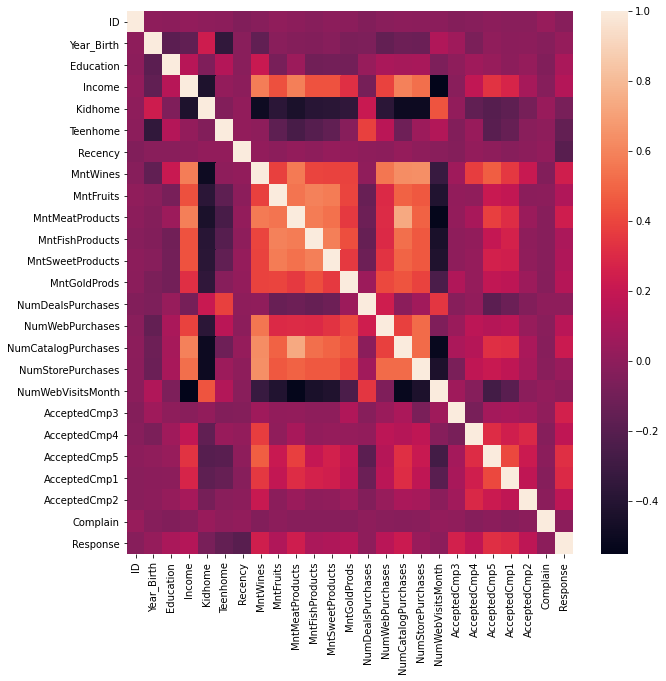

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

It doesn't seem to be any relevant correlation between variables

# Testing Clustering Models

### KMeans

In [61]:
from sklearn.cluster import KMeans
def train_kmeans(data,n):
    kmeans = KMeans(n_clusters=n)
    y_pred = kmeans.fit_predict(data)
    return y_pred

In [62]:
train_kmeans(dataset,5)

ValueError: could not convert string to float: 'Graduation'